In [1]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
import cv2
import pprint
from dev_test_turn_pic import Quaternion

pic_bmp = "Earth_relief_120x256.bmp"

In [48]:
%matplotlib notebook

img = cv2.imread(pic_bmp, cv2.IMREAD_COLOR_RGB)
print(img.shape)

theta_v = np.deg2rad(90)
phi_v = np.deg2rad(90)
xA = np.sin(theta_v) * np.cos(phi_v)
yA = np.sin(theta_v) * np.sin(phi_v)
zA = np.cos(theta_v)

alpha = np.deg2rad(23.4)
x_max = img.shape[1]
y_max = img.shape[0]
x_half = x_max / 2
y_half = y_max / 2

img_out = np.zeros((img.shape[0] * 2, img.shape[1] * 2, img.shape[2]), np.uint8)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for y, row in enumerate(img):
    for x in range(len(row)):
        # normalize y to [-pi/2 ... pi/2]
        y_norm = ((y) / y_max) * (np.pi)
        # normalize x to [-pi ... pi]
        x_norm = ((x) / x_max) * np.pi * 2

        theta_p = y_norm
        phi_p = x_norm
        xB = np.sin(theta_p) * np.cos(phi_p)
        yB = np.sin(theta_p) * np.sin(phi_p)
        zB = np.cos(theta_p)
        qB = Quaternion(0, xB, yB, zB)
        qA = Quaternion(np.cos(0.5 * alpha), xA * np.sin(0.5 * alpha), yA * np.sin(0.5 * alpha),
                        zA * np.sin(0.5 * alpha))
        qAi = qA.conjugate()
        qBr = qA * (qB * qAi)
        # phi_n, theta_n = qBr.to_axisangle()
        # y_n = int(phi_n / np.pi * y_max)
        # x_n = int(theta_n / np.pi * x_max)
        pix = img[y][x]
        # img_out[y_n][x_n] = pix

        x_n, y_n, z_n = qBr.to_xyz()
        col= f'#{pix[0]:02x}{pix[1]:02x}{pix[2]:02x}'
        ax.plot([x_n], [y_n], [z_n], marker='o', color=col)

        # pix = img[y_n][x_n]
        # img_out[y][x] = pix
        # print(x_norm, y_norm, x_n, y_n)

plt.show()
# plt.imshow(img_out)

(120, 256, 3)


<IPython.core.display.Javascript object>

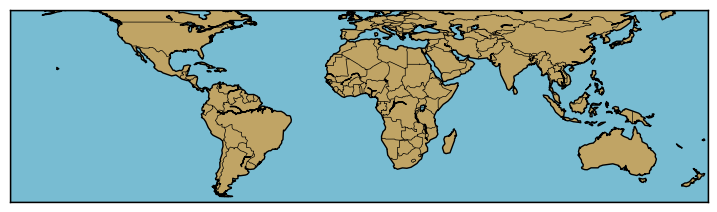

In [22]:
import datetime, matplotlib, time
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np

# from gifly import gif_maker

# plt.ion() allows python to update its figures in real-time
plt.ion()
fig = plt.figure(figsize=(9, 6))

# set the latitude angle steady, and vary the longitude. You can also reverse this to
# create a rotating globe latitudinally as well
lat_viewing_angle = [20.0, 20.0]
lon_viewing_angle = [-180, 180]
rotation_steps = 150
lat_vec = np.linspace(lat_viewing_angle[0], lat_viewing_angle[0], rotation_steps)
lon_vec = np.linspace(lon_viewing_angle[0], lon_viewing_angle[1], rotation_steps)

# for making the gif animation
gif_indx = 0

# define color maps for water and land
ocean_map = (plt.get_cmap('ocean'))(210)
cmap = plt.get_cmap('gist_earth')

# loop through the longitude vector above
# for pp in range(0, len(lat_vec)):
pp = 0
lat_viewing_angle = 90
lon_viewing_angle = 0
plt.cla()
# m = Basemap(projection='cyl',
#             lat_0=lat_viewing_angle, lon_0=lon_viewing_angle)
m = Basemap(projection='cea', llcrnrlat=-60, urcrnrlat=60,
            llcrnrlon=-180, urcrnrlon=180, resolution='c')

# coastlines, map boundary, fill continents/water, fill ocean, draw countries
m.drawmapboundary(fill_color=ocean_map)
m.fillcontinents(color=cmap(200), lake_color=ocean_map)
m.drawcoastlines()
m.drawcountries()

#show the plot, introduce a small delay to allow matplotlib to catch up
plt.show()
# plt.pause(0.01)
# iterate to create the GIF animation
# gif_maker('basemap_rotating_globe.gif','./png_dir/',gif_indx,len(lat_vec)-1,dpi=90)
# gif_indx+=1

C:\Users\skohl\AppData\Local\Programs\Python\Python312\Lib\site-packages\cartopy\crs.py:180: UserWarning: The 'Orthographic' projection does not handle elliptical globes.
  warnings.warn(f'The {self.__class__.__name__!r} projection '


{'ellps': 'sphere', 'proj': 'eqc', 'lon_0': 0.0, 'to_meter': 111319.49079327357, 'vto_meter': 1}


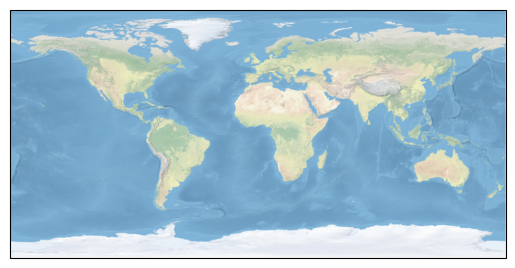

In [61]:
import datetime

import matplotlib.pyplot as plt

import scipy as sp
import cartopy.crs as ccrs
from cartopy.feature.nightshade import Nightshade

#
# rp = ccrs.RotatedPole(pole_longitude=0,
#                       pole_latitude=0,
#                       globe=ccrs.Globe(semimajor_axis=6370000,
#                                        semiminor_axis=6370000))
globe = ccrs.Globe(semimajor_axis=None, semiminor_axis=None, ellipse='sphere', )
rp = ccrs.Orthographic(central_longitude=0.0, central_latitude=0.0, globe=globe)
# rp = ccrs.RotatedGeodetic(pole_longitude=90, pole_latitude=0)

pc = ccrs.PlateCarree(globe=globe)
print(pc.proj4_params)
pc.proj4_params['lon_0'] = 23
ax = plt.axes(projection=pc)
# fig = plt.figure(figsize=(10, 5))

# globe = ccrs.Globe(semimajor_axis=6371229.0, semiminor_axis=6371229.0)
# globe = ccrs.Globe(semimajor_axis=None, semiminor_axis=None)

# ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree(globe=globe))

# date = datetime.datetime(1999, 12, 31, 12)

# ax.set_title(f'Night time shading for {date}')
ax.stock_img()
# ax.add_feature(Nightshade(date, alpha=0.2))
# ax.coastlines()
plt.show()